In [2]:
import numpy
from matplotlib import pyplot
import math
%matplotlib inline

In [3]:
# create the constants
N=50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x=numpy.linspace(x_start, x_end, num=N)
y=numpy.linspace(y_start, y_end, num=N)
X, Y=numpy.meshgrid(x,y)

kappa=1.0
x_doublet, y_doublet = 0.0, 0.0
u_inf=1.0

In [7]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    u = (-strength / (2 * math.pi) *
         ((X - xd)**2 - (Y - yd)**2) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (-strength / (2 * math.pi) *
         2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    psi=-strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    return psi    

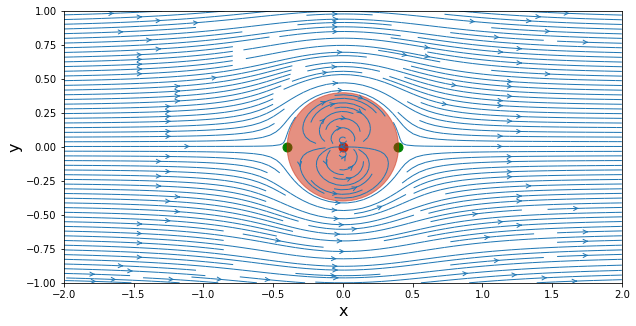

In [8]:
# compute the velocity feild & stream function on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

# get the freestream velocity components
u_freestream = u_inf*numpy.ones((N,N), dtype=float)
v_freestream = numpy.zeros((N,N), dtype=float)

#stream function of the freestream flow
psi_freestream = u_inf*Y

#superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

# plot it up
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X,Y,u,v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# get the cylinder radius and add the cylinder to the figure
R = math.sqrt(kappa/(2*math.pi*u_inf))
circle=pyplot.Circle((0, 0), radius = R, color = '#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)

# get the stagnation points and add them to the figure
x_stagn1, y_stagn1 = math.sqrt(kappa / (2*math.pi*u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2*math.pi*u_inf)), 0.0
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');

In [29]:
# let's create a vortex located at the origin and see what happens
gamma = 5.0
x_vortex, y_vortex = 0.0, 0.0

# create the functions for the vortex
def get_velocity_vortex(strength, xv, yv, X, Y):
    u=strength / (2*math.pi)*(Y-yv) / ((X-xv)**2+(Y-yv)**2)
    v=-strength / (2*math.pi)*(X-xv) / ((X-xv)**2 + (Y-yv)**2)
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):
    psi = strength / (4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    return psi

# now get the velocity feild & stream function on the mesh grid
u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)
psi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)

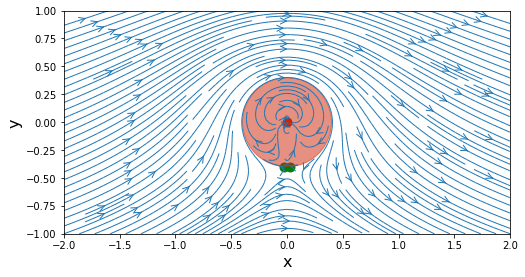

In [30]:
# use superposition with the vortex
u = u_freestream + u_doublet + u_vortex
v = v_freestream + v_doublet + v_vortex
psi = psi_freestream + psi_doublet + psi_vortex

# calculate the cylinder radius 
R=math.sqrt(kappa / (2*math.pi*u_inf))

# find the stagnation points
x_stagn1, y_stagn1 = (+math.sqrt(R**2 - (gamma / (4 * math.pi * u_inf))**2),
                      -gamma / (4 * math.pi * u_inf))
x_stagn2, y_stagn2 = (-math.sqrt(R**2 - (gamma / (4 * math.pi * u_inf))**2),
                      -gamma / (4 * math.pi * u_inf))

# plot it mane
pyplot.figure(figsize=(8.0, 8.0))
pyplot.axis('scaled', adjustable='box')
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X,Y,u,v, density=2, linewidth=1, arrowsize=1.5, arrowstyle='->' )
circle=pyplot.Circle((0.0, 0.0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o')
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');

Here we can see that the circle is rotating in the clockwise direction for a positive gamma which results in the stagnation points moving towards the bottom of the circle as gamma (the strength) is increased. If we change gamma to a negative value we see the opposite result. We defined gamma as positive for clockwise when we created the circulation equation and put a negative sign at the beginning of it. 

Challenge: 
- The challenge task in the doublet notebook was to calculate the radius of the cylinder created by the doublet in a uniform flow. You should have gotten

R=sqrt(κ/2πU∞)

The new challenge is to find where the stagnation points are located on the surface of the cylinder, when there's a vortex. (You just need an expression for the angles.)

What if (Γ/4πU∞R)>1? Experiment with values of gamma.

Answer: See notes

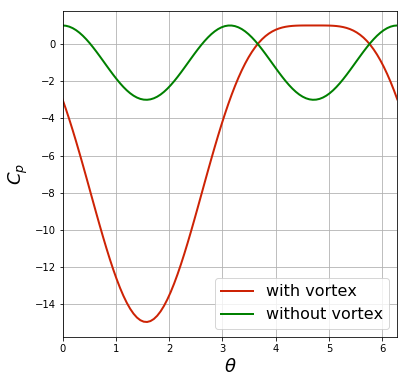

In [31]:
# calculate the surface tangential velocity on the cylinder
theta = numpy.linspace(0.0, 2*math.pi, 100)
u_theta = -2*u_inf*numpy.sin(theta) - gamma / (2*math.pi*R)

# compuet the surface pressure coefficient
cp=1.0 - (u_theta/u_inf)**2

# if there was no vortex
u_theta_no_vortex = -2 *u_inf * numpy.sin(theta)
cp_no_vortex = 1.0 -(u_theta_no_vortex/u_inf)**2

# plot the surface pressure coefficient
size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel(r'$\theta$', fontsize=18)
pyplot.ylabel('$C_p$', fontsize=18)
pyplot.xlim(theta.min(), theta.max())
pyplot.plot(theta, cp, label='with vortex', color='#CD2305', linewidth=2, linestyle='-')
pyplot.plot(theta, cp_no_vortex, label='without vortex', color='g', linewidth=2, linestyle='-')
pyplot.legend(loc='best', prop={'size':16});

Challenge:
- using Bernouli's eqn, replace p in the lift and drag eqns to get lift and drag.
- what does this mean?

Answer: See notes

In [32]:
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/7/78/Flettner_Rotor_Aircraft.jpg')

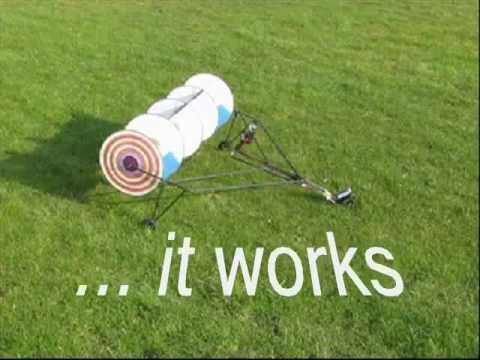

In [33]:
from IPython.display import YouTubeVideo
YouTubeVideo('POHre1P_E1k')